<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Algoritmos_parame%CC%81tricos_vs_noparame%CC%81tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

## **data split**: división entrenamiento y prueba (training - test)




In [ ]:
X, y = datasets.load_diabetes(return_X_y=True)
#X = X[:, np.newaxis, 2] # es igual a X[:, 2].reshape(-1,1)
X.shape

(442, 10)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)


In [ ]:
print(X_train.shape,y_train.shape )

(331, 1) (331,)


In [ ]:
print(X_test.shape,y_test.shape )

(111, 1) (111,)


### grafico de los datos

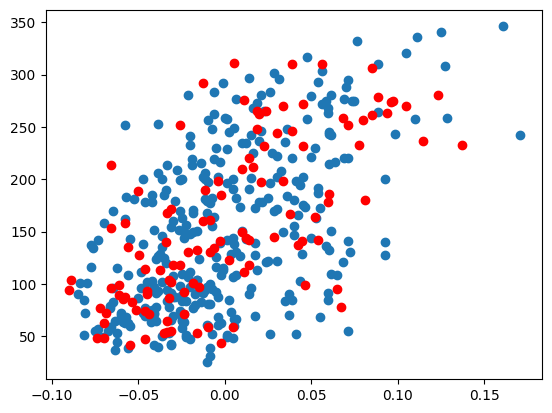

In [ ]:
# index_0 = y_train==0


plt.scatter(X_train[index_0,0],y_train[index_0], color='b')

plt.scatter(X_test[:,0],y_test, color='r')

## **model definition**: definimos el modelo ML a ser usado

In [ ]:
model = LinearRegression()

## **training**: entrenamiento via el método de sklearn `fit()`

In [ ]:
model.fit(X_train, y_train) # objective function = loss function + regularizador
print("parametros del modelo (beta)", model.coef_, model.intercept_)

parametros del modelo (beta) [979.12062053] 151.16706181695213


## **prediction**: predecir en los datos de prueba via  via el método de sklearn `predict()`

In [ ]:
y_pred = model.predict(X_test)

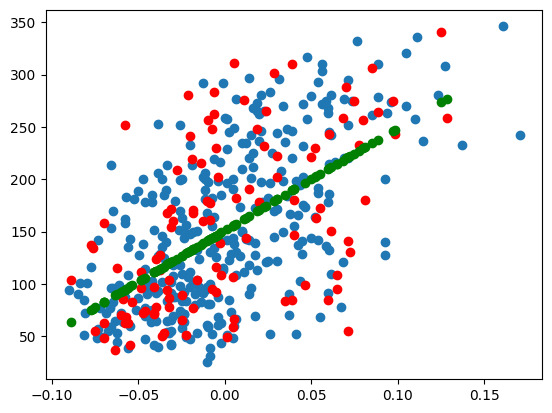

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test, color='r')
plt.scatter(X_test,y_pred, color='g')

## **open the box**: nuestra implementación del método `predict` (un plus en nuestro aprendizaje)

In [ ]:
H = np.c_[X_test, np.ones(len(y_test))]
H @ [model.coef_[0], model.intercept_]

array([130.31637178, 169.36276876, 185.19238916, 141.92476007,
       246.40025471,  93.38059085, 156.69907245, 196.80077746,
        89.15935874, 147.20130021, 180.97115706,  76.49566242,
        82.82751058, 234.79186641,  82.82751058, 221.07286207,
       165.14153666,  97.60182296, 148.25660823,  94.43589888,
       202.07731759,  95.4912069 , 146.14599218, 163.0309206 ,
       230.57063431, 209.46447377, 116.59736743, 152.47784034,
       142.9800681 , 103.93367112, 170.41807679,  94.43589888,
       115.54205941, 135.59291191, 144.03537613,  90.21466677,
       114.48675138, 133.48229586, 247.45556273, 127.1504477 ,
       133.48229586, 161.97561258, 142.9800681 , 120.81859954,
       140.86945205, 203.13262562, 214.74101391, 199.96670154,
       120.81859954, 118.70798349, 178.860541  , 173.58400087,
       123.98452362,  82.82751058, 156.69907245, 106.04428717,
       131.37167981, 210.5197818 ,  77.55097045, 227.40471023,
       221.07286207, 119.76329151, 112.37613533, 217.90

In [ ]:
y_pred

array([130.31637178, 169.36276876, 185.19238916, 141.92476007,
       246.40025471,  93.38059085, 156.69907245, 196.80077746,
        89.15935874, 147.20130021, 180.97115706,  76.49566242,
        82.82751058, 234.79186641,  82.82751058, 221.07286207,
       165.14153666,  97.60182296, 148.25660823,  94.43589888,
       202.07731759,  95.4912069 , 146.14599218, 163.0309206 ,
       230.57063431, 209.46447377, 116.59736743, 152.47784034,
       142.9800681 , 103.93367112, 170.41807679,  94.43589888,
       115.54205941, 135.59291191, 144.03537613,  90.21466677,
       114.48675138, 133.48229586, 247.45556273, 127.1504477 ,
       133.48229586, 161.97561258, 142.9800681 , 120.81859954,
       140.86945205, 203.13262562, 214.74101391, 199.96670154,
       120.81859954, 118.70798349, 178.860541  , 173.58400087,
       123.98452362,  82.82751058, 156.69907245, 106.04428717,
       131.37167981, 210.5197818 ,  77.55097045, 227.40471023,
       221.07286207, 119.76329151, 112.37613533, 217.90

### Cual es el error en el conjunto de entrenamiento?

In [ ]:
y_pred_train = model.predict(X_train)

#np.sqrt(np.sum((y_train - y_pred_train)*(y_train - y_pred_train))/(len(y_train)))

In [ ]:
y_pred_train = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print("el modelo tiene un MAE de {}".format(mean_absolute_error(y_train, y_pred_train )))
print("el modelo tiene un MSE de {}".format(mean_squared_error(y_pred_train, y_train)))
print("el modelo tiene un R2 de {}".format(r2_score(y_train, y_pred_train)))
print("el modelo tiene un Root Mean Square Error (RMSE) {}".format(np.sqrt(mean_squared_error(y_pred_train, y_train))))


el modelo tiene un MAE de 50.5242479158209
el modelo tiene un MSE de 3698.3510732503432
el modelo tiene un R2 de 0.3631496596394367
el modelo tiene un Root Mean Square Error (RMSE) 60.81406969814093


## **model validation**: medir el desempeño del modelo usando las métricas apropiadas

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("el modelo tiene un MAE de {}".format(mean_absolute_error(y_test, y_pred )))
print("el modelo tiene un MSE de {}".format(mean_squared_error(y_pred, y_test)))
print("el modelo tiene un R2 de {}".format(r2_score(y_test, y_pred)))
print("el modelo tiene un Root Mean Square Error (RMSE) {}".format(np.sqrt(mean_squared_error(y_pred, y_test))))


el modelo tiene un MAE de 54.772748217994184
el modelo tiene un MSE de 4474.969746177861
el modelo tiene un R2 de 0.28754298506818365
el modelo tiene un Root Mean Square Error (RMSE) 66.8952146732325


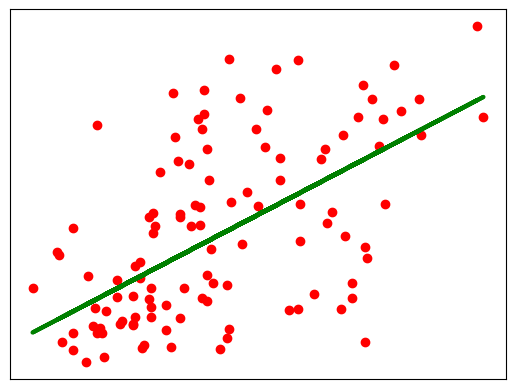

In [ ]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="green", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Algoritmo ML no paramétrico — aka "instance-based ML, case-based model"

---

* ejemplo usando un modelo de Máquina de Vectores de Soporte (SVM)
* introducción de esquema:
* ejemplo usando un modelo de regresión lineal
* introducción de esquema:

1.   **data split**: división entrenamiento y prueba (training - test)
2.   **model definition**: definimos el modelo ML a ser usado
3.   **training**: entrenamiento via el método de sklearn `fit()`
4.   **prediction**: predecir en los datos de prueba via  via el método de sklearn `predict()`
5.   **measuring the generalization**: medir el desempeño de generalización del modelo usando las métricas apropiadas
6.   **open the box**: nuestra implementación del método `predict` (un plus en nuestro aprendizaje)
---


## **model definition**: definimos el modelo ML a ser usado

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

## **training**: entrenamiento via el método de sklearn `fit()`

In [ ]:
#model = SVR(kernel='rbf', C = 10, gamma= 10000) # semiparametrico
#model = SVR(kernel='linear', C = 1000)
model = KNeighborsRegressor(n_neighbors= 1)
#entrenamiento
model.fit(X_train, y_train) # objective function = loss function + regularizador

KNeighborsRegressor(n_neighbors=1)

In [ ]:
#print("parametros del modelo (beta) {}".format(model.dual_coef_))

In [ ]:
#print("los vectores de soporte son {}".format(model.support_vectors_))

## **prediction**: predecir en los datos de prueba via  via el método de sklearn `predict()`

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([107., 273., 236.,  59., 274.,  64.,  60., 174.,  65.,  88., 122.,
       116.,  49., 261.,  49., 252.,  90., 143., 141., 158., 164., 183.,
       126., 143., 332., 268., 125., 196.,  39., 128., 237., 158., 102.,
       104., 182.,  53., 129., 101., 274.,  84., 101., 111.,  39.,  43.,
        97., 142., 217., 280.,  43.,  84., 145., 265., 152.,  49.,  60.,
       114., 111., 245.,  48., 332., 252.,  53.,  91., 121., 246.,  83.,
        94., 108., 152., 156., 332., 152., 246., 109., 126.,  53.,  53.,
       164., 275., 164., 191., 152.,  84., 277., 310., 155., 143.,  84.,
       308., 129., 121., 109., 185.,  72., 182., 214., 155., 101., 122.,
       202., 191., 116.,  68.,  91., 128., 275., 138., 308., 281., 126.,
       217.])

## **model evaluation**: medir el desempeño del modelo usando las métricas apropiadas

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print("el modelo tiene un MAE de {}".format(mean_absolute_error(y_test, y_pred )))
print("el modelo tiene un MSE de {}".format(mean_squared_error(y_pred, y_test)))
print("el modelo tiene un R2 de {}".format(r2_score(y_test, y_pred)))
print("el modelo tiene un Root Mean Square Error (RMSE) {}".format(np.sqrt(mean_squared_error(y_pred, y_test))))


el modelo tiene un MAE de 57.5281981981982
el modelo tiene un MSE de 4823.584636936937
el modelo tiene un R2 de 0.2320402356600717
el modelo tiene un Root Mean Square Error (RMSE) 69.45203119374506


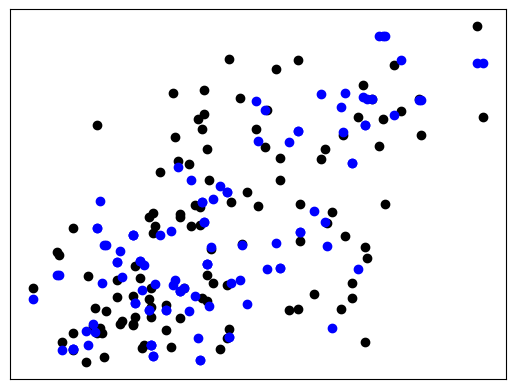

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.scatter(X_test, y_pred, color="blue", linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)

tree = DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp( tree, X_train, y_train, X_test, y_test,
                                                            loss='0-1_loss',
                                                            random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.062
Average bias: 0.022
Average variance: 0.040


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

loss = []
bias = []
var = []

for n_neighbors in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)

  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(knn, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  var.append(avg_var)



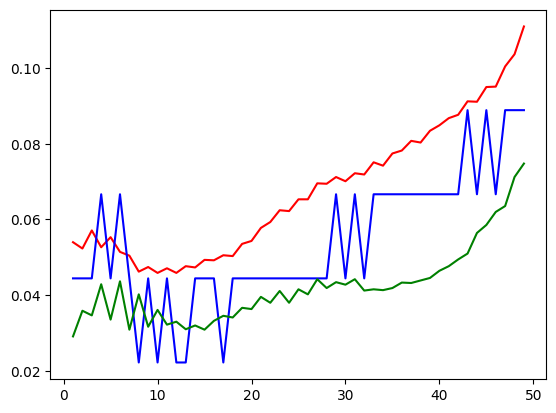

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,50),loss, c='r')
plt.plot(range(1,50),bias, c='b')
plt.plot(range(1,50),var, c='g')
